# Full Gait

----

Kevin J. Walchko, created 12 Nov 2016

This notebook calls the actual robot code and plots both the x,y,z positions and the 3 servo angles of a leg during a gait. The command can be modified below to determine the movement.

In [2]:
%matplotlib inline

In [3]:
from __future__ import print_function
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import sys
# sys.path.insert(0, '../..')
from math import pi, sqrt
# from quadruped import Quadruped
from quadruped import DiscreteRippleGait

<<< WARNING: using fake raspberry pi interfaces >>>
<<< Using: <class 'fake_rpi.RPi._GPIO'> >>>


## Setup

Create a quadrupted `robot` with correct leg segment lengths.

In [3]:
data = {
#     'serialPort': '/dev/tty.usbserial-A5004Flb',
    'legLengths': {
        'coxaLength': 45,
        'femurLength': 55,
        'tibiaLength': 104
    },
    'legAngleLimits': [[-90, 90], [-90, 90], [-180, 0]],
    'legOffset': [150, 150, 150+90]
}
robot = Quadruped(data)
leg = robot.legs[0].foot0

Now create a gait and a command to execute for one complete duty cycle. This will produce both the foot positions (x,y,z) and the servo angles ($\theta_1$,$\theta_2$,$\theta_3$) for each step sequence. 

In [13]:
# Edit this command for linear [mm] or angular [rads] movements.
# cmd = {'linear': [0,0], 'angle': pi/4}
cmd = {'linear': [50,50], 'angle': 0}
height = 25  # height the foot is lifted during movement in mm

# gait = ContinousRippleGait(height, leg)
gait = DiscreteRippleGait(height, leg)
alpha = 1.0
pos = []
for i in range(0,12):
    p = gait.eachLeg(i,cmd)
    pos.append(p)
    print('pos: {:.2f} {:.2f} {:.2f}'.format(*p))

pos: 110.89 -25.00 -38.68
pos: 127.56 -8.33 -26.18
pos: 144.22 8.33 -26.18
pos: 160.89 25.00 -38.68
pos: 155.34 19.44 -51.18
pos: 149.78 13.89 -51.18
pos: 144.22 8.33 -51.18
pos: 138.67 2.78 -51.18
pos: 133.11 -2.78 -51.18
pos: 127.56 -8.33 -51.18
pos: 122.00 -13.89 -51.18
pos: 116.45 -19.44 -51.18


In [14]:
angle = []
for p in pos:
#     print('pos: {:.2f} {:.2f} {:.2f}'.format(*p))
    a = robot.legs[0].move(*p)
    print('angle: {:.2f} {:.2f} {:.2f}'.format(*a))
    if a:
        angle.append(a)

angle: -12.70 71.11 -131.83
angle: -3.74 73.93 -123.39
angle: 3.31 60.99 -106.57
angle: 8.83 38.04 -82.28
angle: 7.14 32.77 -83.87
angle: 5.30 36.66 -90.54
angle: 3.31 40.21 -96.67
angle: 1.15 43.47 -102.33
angle: -1.20 46.47 -107.57
angle: -3.74 49.22 -112.41
angle: -6.49 51.74 -116.87
angle: -9.48 54.02 -120.96


## Plotting the Results

We will now plot the x, y, z, and x-y plane (ground plane) plots for the foot's position. Also the each of the leg's servo angles will be plotted.  

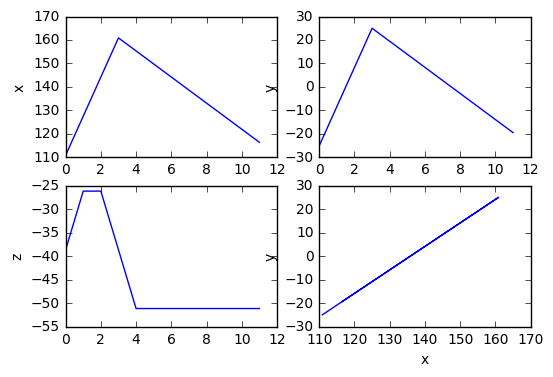

In [15]:
px = []
py = []
pz = []
for p in pos:
    px.append(p[0])
    py.append(p[1])
    pz.append(p[2])
#     pz.append(sqrt(p[0]**2+p[1]**2))

plt.subplot(2,2,1);
plt.plot(px);
plt.ylabel('x');

plt.subplot(2,2,2);
plt.plot(py);
plt.ylabel('y');

plt.subplot(2,2,3);
plt.plot(pz);
plt.ylabel('z');

plt.subplot(2,2,4);
plt.plot(px,py);
plt.ylabel('y');
plt.xlabel('x');

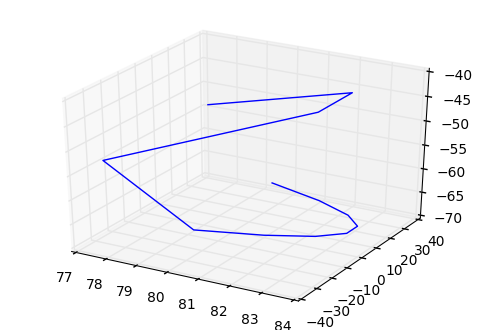

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(px, py, pz);

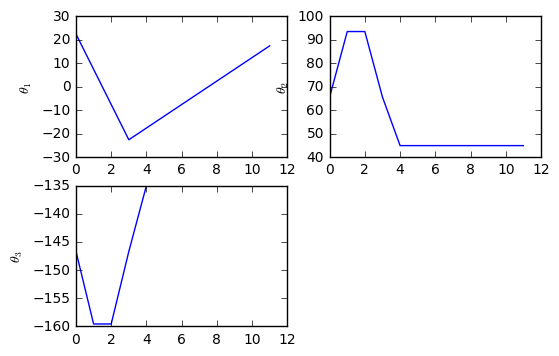

In [9]:
t1 = []
t2 = []
t3 = []
for a in angle:
    t1.append(a[0])
    t2.append(a[1])
    t3.append(a[2])

plt.subplot(2,2,1);
plt.plot(t1)
plt.ylabel('$\\theta_1$')

plt.subplot(2,2,2)
plt.plot(t2)
plt.ylabel('$\\theta_2$')

plt.subplot(2,2,3);
plt.plot(t3)
plt.ylabel('$\\theta_3$');

# plt.subplot(2,2,4);
# plt.plot(px,py)
# plt.ylabel('y')
# plt.xlabel('x')

In [10]:
print('Number of points: {}'.format(len(angle)))
print('-----------------------')
for a in angle:
    print('{:.2f} {:.2f} {:.2f}'.format(*a))

Number of points: 12
-----------------------
22.50 65.67 -146.69
7.50 93.57 -159.56
-7.50 93.57 -159.56
-22.50 65.67 -146.69
-17.50 45.00 -135.00
-12.50 45.00 -135.00
-7.50 45.00 -135.00
-2.50 45.00 -135.00
2.50 45.00 -135.00
7.50 45.00 -135.00
12.50 45.00 -135.00
17.50 45.00 -135.00



-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.